# Base para Sprint 1

- Usar máximo 3 variables explicativas (Buscamos velocidad)
- Mucho ojo a la calidad de los datos, el ingeniero de datos DEBE entregar una tabla maestra única, con datos correctos, en el tipo correcto y que representen el negocio.

In [ ]:
# !pip install -r requirements.txt

In [125]:
!pip install category_encoders kds shap missingpy pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 86.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b0c89cdd0e693082a8bd66d4caca29e5a4c9ea63e44e0

In [126]:
import pandas as pd
import numpy as np
import category_encoders as ce
import matplotlib.pyplot as plt
import os
import seaborn as sns
import kds
import shap
import umap
from typing import Dict, Any


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.cluster import DBSCAN

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PowerTransformer

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import KMeansSMOTE
from sklearn.neural_network import MLPClassifier

from sklearn import model_selection
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.calibration import CalibratedClassifierCV


from sklearn.model_selection import cross_val_score, KFold
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline
# from missingpy import MissForest
from sklearn.feature_selection import SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from datetime import datetime



from statsmodels.compat.python import Literal, lzip
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")

# Pipeline

## Sprint 1

In [39]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
X['categorical_column'] = np.random.choice(['A', 'B', 'C'], X.shape[0])
y = data.target
X['mes'] = np.random.choice(['201901', '201902', '201903', '201904', '201905', '201906', '201907', '201908', '201909', '201910', '201911', '201912'], X.shape[0])
pd.Series(y).value_counts()
X.head()

df = X
df['target'] = y
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,categorical_column,mes,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,A,201901,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,A,201908,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,C,201905,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,C,201902,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,B,201909,0


In [40]:
# df = ml_functions.read_table('sandbox', 'churn')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,categorical_column,mes,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,A,201901,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,A,201908,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,C,201905,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,C,201902,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,B,201909,0


La tabla debe tener todas las variables explicativas en su versión presente y 2fw

In [99]:
numerical_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
categorical_features = ['categorical_column']
month_feature = 'mes'
scoring_month = '201912'
validation_month = '201911'

In [42]:
from sklearn.model_selection import train_test_split

def stratified_ad_hoc(df: pd.DataFrame, stratified_variables: np.ndarray, size_percentage: float = 0.3) -> pd.DataFrame:
    """
    Description: stratified_ad_hoc functions generate a stratified sample of the dataframe.
    Input:
        - df : pd.DataFrame 
            Dataframe to be stratified.
        - label_name : str
            Name of the label column.
        - stratified_variables : np.ndarray
            Array of the variables to be stratified.
        - size_percentage : float
            Percentage of the dataframe to be returned.
    Output:
        - df_stratified : pd.DataFrame
            Stratified sample of the dataframe.
    """

    df_stratified, df_test = train_test_split(df, test_size = (1-size_percentage), stratify = df[stratified_variables])
    
    return df_stratified

In [43]:
df_adhoc = stratified_ad_hoc(df, categorical_features, 0.99)
print(df_adhoc.shape)

(563, 33)


Con las dos funciones siguientes el Ingeniero de datos debe garantizar:

- Que las variables categóricas no tengan alta cardinalidad
- Que los tipos de datos sean correctos
- Que las variables tengan sentido en el negocio
- Que las variables no tengan valores nulos excesivos ni ilógicos
- Que la distribución de las variables sea similar en los periodos, y si se ha rpesentado algún cambio sea producto de un cambio en el negocio y no de un error en la captura de datos.

In [10]:
# ml_functions.descriptive(df_adhoc, 'target')

In [44]:
from sklearn.model_selection import KFold

def cross_validation_sampling(df: pd.DataFrame, label: str, cv: int, scoring: str, month_feature: str, scoring_month: str, validation_month: str):
    """
    Description: cross_validation_sampling function to generate a cross validation sampling
    Input:
    - df: dataframe
    - label: label column name
    - cv: number of folds
    - scoring: scoring metric
    - month_feature: month feature name
    - scoring_month: scoring month
    - validation_month: validation month
    Output:
    - train_df: dataframe with the training data
    - validation_df: dataframe with the validation data
    - scoring_df: dataframe with the scoring data
    - cv: cross validation object
    """

    train_df = df[(df[month_feature] != scoring_month) & (df[month_feature] != validation_month)]
    validation_df = df[df[month_feature] == validation_month]
    scoring_df = df[df[month_feature] == scoring_month]
    cv = KFold(n_splits=cv, shuffle=True, random_state=1)

    return train_df, validation_df, scoring_df, cv

In [75]:
train_df, validation_df, scoring_df, cv_df = cross_validation_sampling(df_adhoc, 'target', 5, 'roc_auc', month_feature, scoring_month, validation_month)
train_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,categorical_column,mes,target
540,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,0.06782,...,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134,B,201904,1
523,13.71,18.68,88.73,571.0,0.09916,0.10700,0.05385,0.03783,0.1714,0.06843,...,701.9,0.1425,0.2566,0.1935,0.12840,0.2849,0.09031,A,201905,1
466,13.14,20.74,85.98,536.9,0.08675,0.10890,0.10850,0.03510,0.1562,0.06020,...,689.1,0.1351,0.3549,0.4504,0.11810,0.2563,0.08174,A,201903,1
107,12.36,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,0.1602,0.06066,...,544.1,0.1184,0.1963,0.1937,0.08442,0.2983,0.07185,C,201901,1
517,19.89,20.26,130.50,1214.0,0.10370,0.13100,0.14110,0.09431,0.1802,0.06188,...,1646.0,0.1417,0.3309,0.4185,0.16130,0.2549,0.09136,A,201909,0


In [76]:


def nulls_per_df(train_df: pd.DataFrame, validation_df: pd.DataFrame, scoring_df: pd.DataFrame, numerical_features: list):
    """
    Description: nulls_per_df function 
    Input:
    - train_df: Dataframe with the training data
    - validation_df: Dataframe with the validation data
    - scoring_df: Dataframe with the scoring data
    - numerical_features: List with the numerical features
    Output: print with the number of nulls per dataframe and plot with the kde distribution per numerical_feature
    """
    
    train_nulls = train_df.isnull().sum()
    validation_nulls = validation_df.isnull().sum()
    scoring_nulls = scoring_df.isnull().sum()
    nulls_df = pd.DataFrame({'train_nulls': train_nulls, 'validation_nulls': validation_nulls, 'scoring_nulls': scoring_nulls})
    
    dtypes_train = train_df.dtypes
    dtypes_validation = validation_df.dtypes
    dtypes_scoring = scoring_df.dtypes
    dtypes_df = pd.DataFrame({'dtypes_train': dtypes_train, 'dtypes_validation': dtypes_validation, 'dtypes_scoring': dtypes_scoring})

    for feature in numerical_features:
        plt.figure(figsize=(10,5))
        sns.kdeplot(train_df[feature], label='train')
        sns.kdeplot(validation_df[feature], label='validation')
        sns.kdeplot(scoring_df[feature], label='scoring')
        plt.title(feature)
        plt.legend()
        plt.show()

    return nulls_df, dtypes_df

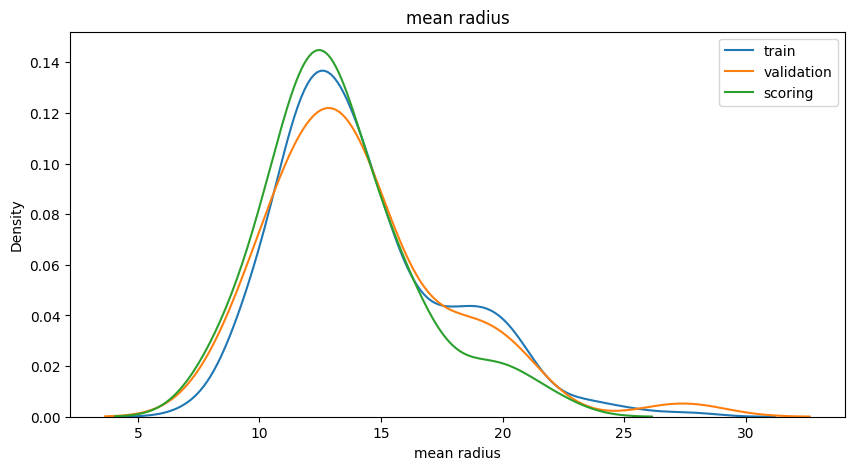

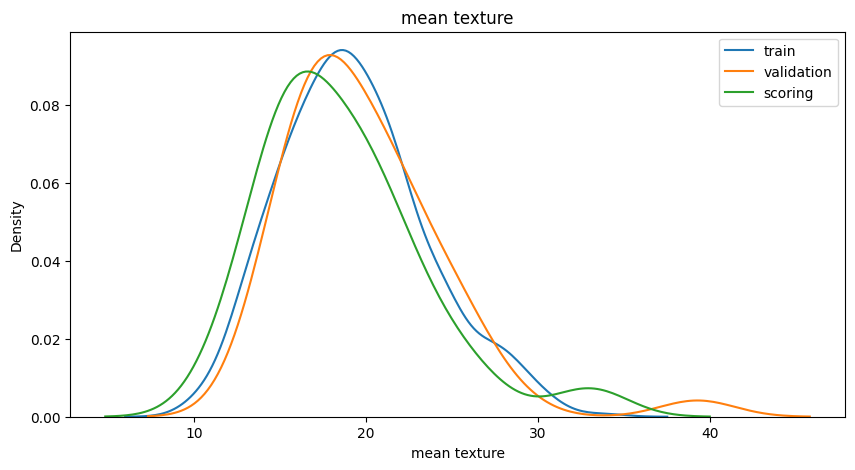

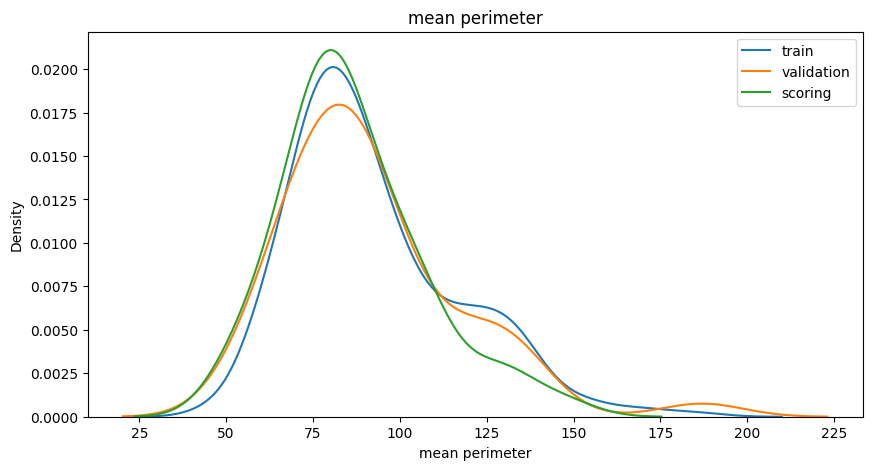

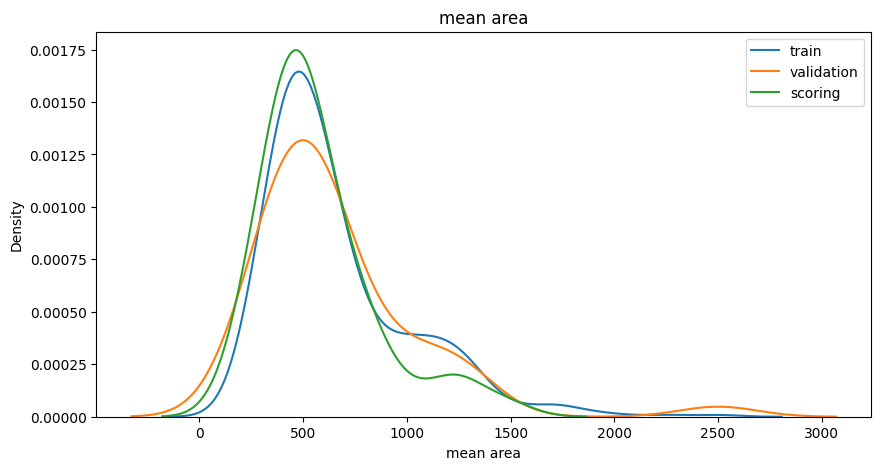

,train_nulls,validation_nulls,scoring_nulls
mean radius,0,0,0
mean texture,0,0,0
mean perimeter,0,0,0
mean area,0,0,0
mean smoothness,0,0,0


In [77]:
data_quality_nulls, data_quality_dtypes  = nulls_per_df(train_df, validation_df, scoring_df, numerical_features)
data_quality_nulls.head()

In [78]:
data_quality_dtypes.head()

,dtypes_train,dtypes_validation,dtypes_scoring
mean radius,float64,float64,float64
mean texture,float64,float64,float64
mean perimeter,float64,float64,float64
mean area,float64,float64,float64
mean smoothness,float64,float64,float64


In [49]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


def apply_umap(df_train, df_validation, df_scoring, numerical_features, target_name, n_components):
    umap_model = umap.UMAP(n_components=n_components, random_state=42)
    umap_data_train = umap_model.fit_transform(df_train[numerical_features])
    umap_data_validation = umap_model.transform(df_validation[numerical_features])
    umap_data_scoring = umap_model.transform(df_scoring[numerical_features])

    sns.scatterplot(x=umap_data_train[:,0], y=umap_data_train[:,1], hue=df_train[target_name])
    plt.show()
  
    sns.scatterplot(x=umap_data_validation[:,0], y=umap_data_validation[:,1], hue=df_validation[target_name])
    plt.show()

    sns.scatterplot(x=umap_data_scoring[:,0], y=umap_data_scoring[:,1])
    plt.show()

    explained_variance = np.var(umap_data_train, axis=0)
    explained_variance_ratio = explained_variance / np.sum(explained_variance)
    explained_variance_ratio_cumsum = np.cumsum(explained_variance_ratio)
    
    return umap_data_train, umap_data_validation, umap_data_scoring, explained_variance_ratio_cumsum


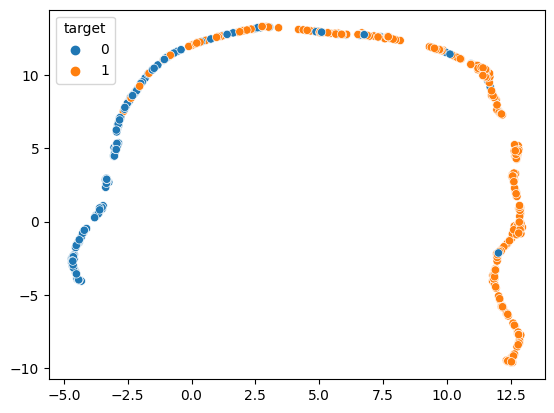

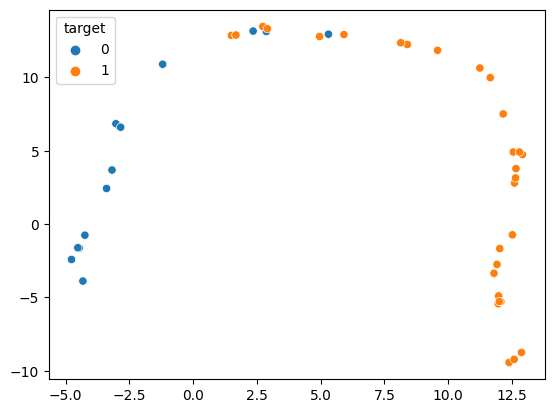

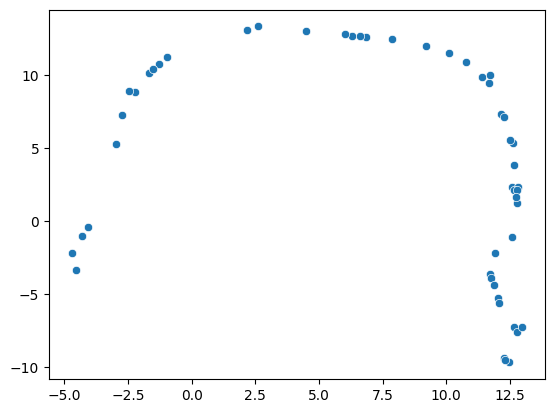

In [80]:
umap_data_train, umap_data_validation, umap_data_scoring, explained_variance_ratio_cumsum = apply_umap(train_df, validation_df, scoring_df, numerical_features, 'target', n_components=2)

In [81]:
umap_data_train

array([[ 1.28956070e+01, -8.19601893e-01],
       [ 6.88244963e+00,  1.26859064e+01],
       [ 9.81454563e+00,  1.16508226e+01],
       [ 1.27125177e+01,  4.88813305e+00],
       [-4.22825480e+00, -7.34156609e-01],
       [ 1.19271069e+01,  8.30980206e+00],
       [ 1.21463766e+01, -5.72089481e+00],
       [-2.32429600e+00,  8.54895878e+00],
       [ 1.27992783e+01, -7.60683966e+00],
       [ 1.27486839e+01,  4.39749861e+00],
       [ 1.26114445e+01,  2.83546495e+00],
       [-1.71127856e+00,  1.00297003e+01],
       [ 2.92474699e+00,  1.32924747e+01],
       [-4.54889297e+00, -3.41211796e+00],
       [ 1.28535147e+01,  8.41867745e-01],
       [ 1.23084717e+01, -1.61869824e+00],
       [ 1.26214304e+01, -9.14463425e+00],
       [ 1.27170982e+01,  4.79694796e+00],
       [ 1.23284588e+01, -6.25875330e+00],
       [ 1.16950502e+01,  9.17418003e+00],
       [ 1.14650965e+01,  1.00016699e+01],
       [-6.80831727e-03,  1.20070438e+01],
       [-3.77071071e+00,  3.27537388e-01],
       [ 1.

In [83]:
train_df = train_df.reset_index(drop=True)
train_df['umap_c1'] = pd.DataFrame(umap_data_train)[0]
train_df['umap_c2'] = pd.DataFrame(umap_data_train)[1]

validation_df = validation_df.reset_index(drop=True)
validation_df['umap_c1'] = pd.DataFrame(umap_data_validation)[0]
validation_df['umap_c2'] = pd.DataFrame(umap_data_validation)[1]

scoring_df = scoring_df.reset_index(drop=True)
scoring_df['umap_c1'] = pd.DataFrame(umap_data_scoring)[0]
scoring_df['umap_c2'] = pd.DataFrame(umap_data_scoring)[1]

scoring_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,categorical_column,mes,target,umap_c1,umap_c2
0,12.77,22.47,81.72,506.3,0.09055,0.05761,0.04711,0.02704,0.1585,0.06065,...,0.15230,0.2177,0.09331,0.2829,0.08067,A,201912,0,11.417432,9.835120
1,15.53,33.56,103.70,744.9,0.10630,0.16390,0.17510,0.08399,0.2091,0.06650,...,0.55640,0.5703,0.20140,0.3512,0.12040,A,201912,0,-1.293852,10.727225
2,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,...,0.17220,0.2310,0.11290,0.2778,0.07012,B,201912,1,-2.207057,8.848010
3,14.22,23.12,94.37,609.9,0.10750,0.24130,0.19810,0.06618,0.2384,0.07542,...,0.93270,0.8488,0.17720,0.5166,0.14460,C,201912,0,4.476581,12.985018
4,13.59,17.84,86.24,572.3,0.07948,0.04052,0.01997,0.01238,0.1573,0.05520,...,0.07622,0.1060,0.05185,0.2335,0.06263,B,201912,1,6.861025,12.622016


In [84]:
def apply_pca(df_train, df_validation, df_scoring, numerical_features, target_name, n_components):
    model = PCA(n_components=n_components, random_state=42)
    reduced_data_train = model.fit_transform(df_train[numerical_features])
    reduced_data_validation = model.transform(df_validation[numerical_features])
    reduced_data_scoring = model.transform(df_scoring[numerical_features])

    sns.scatterplot(x=reduced_data_train[:,0], y=reduced_data_train[:,1], hue=df_train[target_name])
    plt.show()
  
    sns.scatterplot(x=reduced_data_validation[:,0], y=reduced_data_validation[:,1], hue=df_validation[target_name])
    plt.show()

    sns.scatterplot(x=reduced_data_scoring[:,0], y=reduced_data_scoring[:,1])
    plt.show()

    explained_variance = np.var(reduced_data_train, axis=0)
    explained_variance_ratio = explained_variance / np.sum(explained_variance)
    explained_variance_ratio_cumsum = np.cumsum(explained_variance_ratio)
    
    return reduced_data_train, reduced_data_validation, reduced_data_scoring, explained_variance_ratio_cumsum

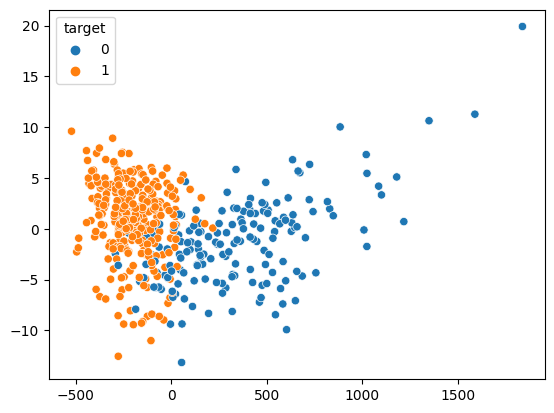

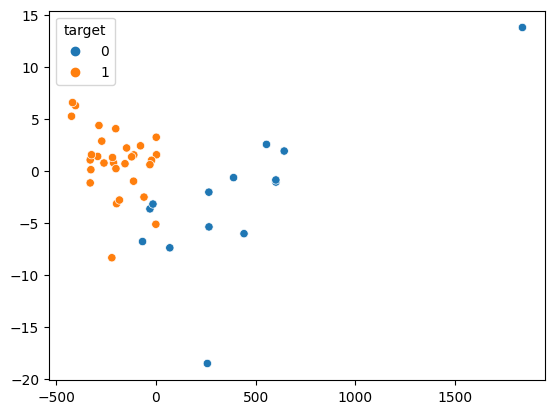

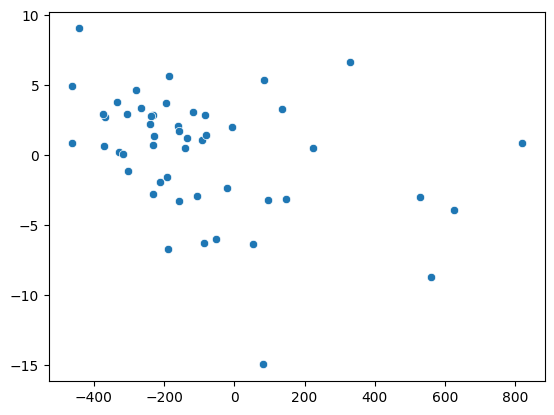

In [85]:
reduced_data_train_pca, reduced_data_validation_pca, reduced_data_scoring_pca, explained_variance_ratio_cumsum = apply_pca(train_df, validation_df, scoring_df, numerical_features, 'target', n_components=2)

In [86]:
train_df = train_df.reset_index(drop=True)
train_df['pca_c1'] = pd.DataFrame(reduced_data_train_pca)[0]
train_df['pca_c2'] = pd.DataFrame(reduced_data_train_pca)[1]

validation_df = validation_df.reset_index(drop=True)
validation_df['pca_c1'] = pd.DataFrame(reduced_data_validation_pca)[0]
validation_df['pca_c2'] = pd.DataFrame(reduced_data_validation_pca)[1]

scoring_df = scoring_df.reset_index(drop=True)
scoring_df['pca_c1'] = pd.DataFrame(reduced_data_scoring_pca)[0]
scoring_df['pca_c2'] = pd.DataFrame(reduced_data_scoring_pca)[1]

scoring_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst concave points,worst symmetry,worst fractal dimension,categorical_column,mes,target,umap_c1,umap_c2,pca_c1,pca_c2
0,12.77,22.47,81.72,506.3,0.09055,0.05761,0.04711,0.02704,0.1585,0.06065,...,0.09331,0.2829,0.08067,A,201912,0,11.417432,9.835120,-157.688936,-3.280201
1,15.53,33.56,103.70,744.9,0.10630,0.16390,0.17510,0.08399,0.2091,0.06650,...,0.20140,0.3512,0.12040,A,201912,0,-1.293852,10.727225,81.907828,-14.977217
2,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,...,0.11290,0.2778,0.07012,B,201912,1,-2.207057,8.848010,136.858275,3.310783
3,14.22,23.12,94.37,609.9,0.10750,0.24130,0.19810,0.06618,0.2384,0.07542,...,0.17720,0.5166,0.14460,C,201912,0,4.476581,12.985018,-53.455873,-6.031440
4,13.59,17.84,86.24,572.3,0.07948,0.04052,0.01997,0.01238,0.1573,0.05520,...,0.05185,0.2335,0.06263,B,201912,1,6.861025,12.622016,-91.545909,1.053092


In [25]:
def apply_tsne(df_train, df_validation, df_scoring, numerical_features, target_name, n_components):
    model = TSNE(n_components=n_components, perplexity=30, random_state=42)
    
    reduced_data_train = model.fit_transform(df_train[numerical_features])
    reduced_data_validation = model.fit_transform(df_validation[numerical_features])
    reduced_data_scoring = model.fit_transform(df_scoring[numerical_features])

    sns.scatterplot(x=reduced_data_train[:,0], y=reduced_data_train[:,1], hue=df_train[target_name])
    plt.show()
  
    sns.scatterplot(x=reduced_data_validation[:,0], y=reduced_data_validation[:,1], hue=df_validation[target_name])
    plt.show()

    sns.scatterplot(x=reduced_data_scoring[:,0], y=reduced_data_scoring[:,1])
    plt.show()

    explained_variance = np.var(reduced_data_train, axis=0)
    explained_variance_ratio = explained_variance / np.sum(explained_variance)
    explained_variance_ratio_cumsum = np.cumsum(explained_variance_ratio)
    
    return reduced_data_train, reduced_data_validation, reduced_data_scoring, explained_variance_ratio_cumsum

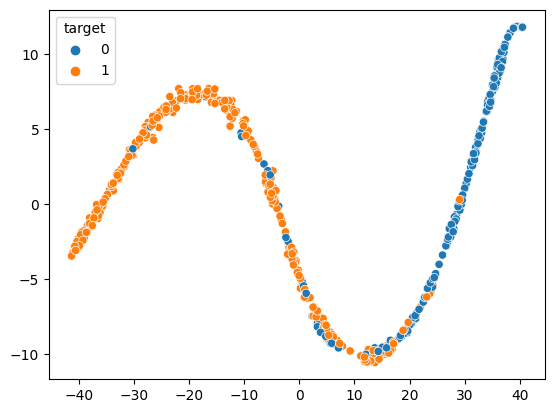

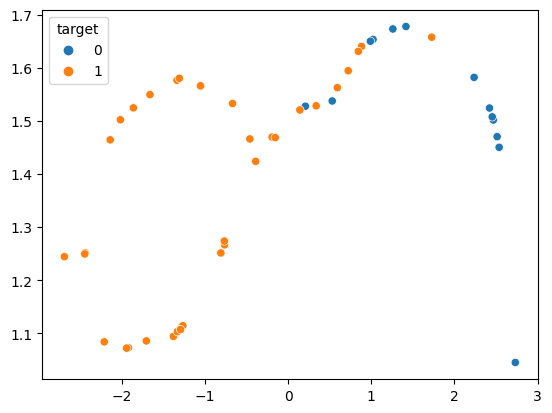

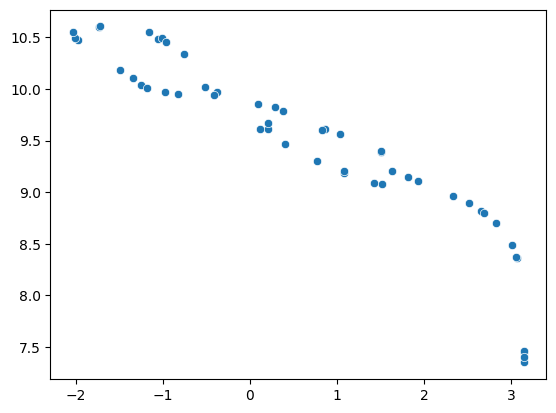

In [26]:
reduced_data_train_tsne, reduced_data_validation_tsne, reduced_data_scoring_tsne, explained_variance_ratio_cumsum = apply_tsne(train_df, validation_df, scoring_df, numerical_features, 'target', n_components=2)

In [87]:
train_df = train_df.reset_index(drop=True)
train_df['tsne_c1'] = pd.DataFrame(reduced_data_train_tsne)[0]
train_df['tsne_c2'] = pd.DataFrame(reduced_data_train_tsne)[1]

validation_df = validation_df.reset_index(drop=True)
validation_df['tsne_c1'] = pd.DataFrame(reduced_data_validation_tsne)[0]
validation_df['tsne_c2'] = pd.DataFrame(reduced_data_validation_tsne)[1]

scoring_df = scoring_df.reset_index(drop=True)
scoring_df['tsne_c1'] = pd.DataFrame(reduced_data_scoring_tsne)[0]
scoring_df['tsne_c2'] = pd.DataFrame(reduced_data_scoring_tsne)[1]

scoring_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst fractal dimension,categorical_column,mes,target,umap_c1,umap_c2,pca_c1,pca_c2,tsne_c1,tsne_c2
0,12.77,22.47,81.72,506.3,0.09055,0.05761,0.04711,0.02704,0.1585,0.06065,...,0.08067,A,201912,0,11.417432,9.835120,-157.688936,-3.280201,2.654258,8.819266
1,15.53,33.56,103.70,744.9,0.10630,0.16390,0.17510,0.08399,0.2091,0.06650,...,0.12040,A,201912,0,-1.293852,10.727225,81.907828,-14.977217,0.775316,9.301592
2,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,...,0.07012,B,201912,1,-2.207057,8.848010,136.858275,3.310783,-1.246745,10.038085
3,14.22,23.12,94.37,609.9,0.10750,0.24130,0.19810,0.06618,0.2384,0.07542,...,0.14460,C,201912,0,4.476581,12.985018,-53.455873,-6.031440,1.507691,9.393388
4,13.59,17.84,86.24,572.3,0.07948,0.04052,0.01997,0.01238,0.1573,0.05520,...,0.06263,B,201912,1,6.861025,12.622016,-91.545909,1.053092,2.684119,8.799681


In [100]:
numerical_features = numerical_features + ['umap_c1', 'umap_c2', 'pca_c1', 'pca_c2', 'tsne_c1', 'tsne_c2']
numerical_features

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'umap_c1',
 'umap_c2',
 'pca_c1',
 'pca_c2',
 'tsne_c1',
 'tsne_c2']

In [107]:
from sklearn.cluster import DBSCAN

def umap_dbscan_outliers(df, num_cols, n_neighbors=15, min_samples=5, eps=0.5):
    """
    Description: This function performs UMAP dimensionality reduction on the input data and detects outliers using DBSCAN clustering.
                 It also returns the input dataframe with the outliers removed.
    Input: 
        - df: Pandas dataframe with the data to be reduced and clustered
        - num_cols: list of numerical columns in the dataframe
        - n_neighbors: The number of nearest neighbors used in the UMAP algorithm
        - min_samples: The minimum number of samples in a neighborhood for a point to be considered a core point in DBSCAN
        - eps: The maximum distance between two samples for them to be considered as in the same neighborhood in DBSCAN
    Output:
        - cluster_labels: Array of cluster labels assigned by DBSCAN (-1 indicates an outlier)
        - reduced_data: Array of reduced data points with two dimensions
        - df_no_outliers: The input dataframe with the outliers removed
    """
    
    data = df[num_cols].values
    
    reducer = umap.UMAP(n_neighbors=n_neighbors, n_components=2, metric='euclidean')
    embedding = reducer.fit_transform(data)
    
    clusterer = DBSCAN(min_samples=min_samples, eps=eps)
    cluster_labels = clusterer.fit_predict(embedding)

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=cluster_labels, ax=ax[0])
    ax[0].set_title('UMAP')
    sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=df['target'], ax=ax[1])
    plt.show()
    
    reduced_data = embedding
    cluster_labels = cluster_labels
    
    df_no_outliers = df[cluster_labels != -1]
    
    return cluster_labels, reduced_data, df_no_outliers

In [105]:
train_df.isnull().sum()
train_df = train_df.fillna(train_df.mean())

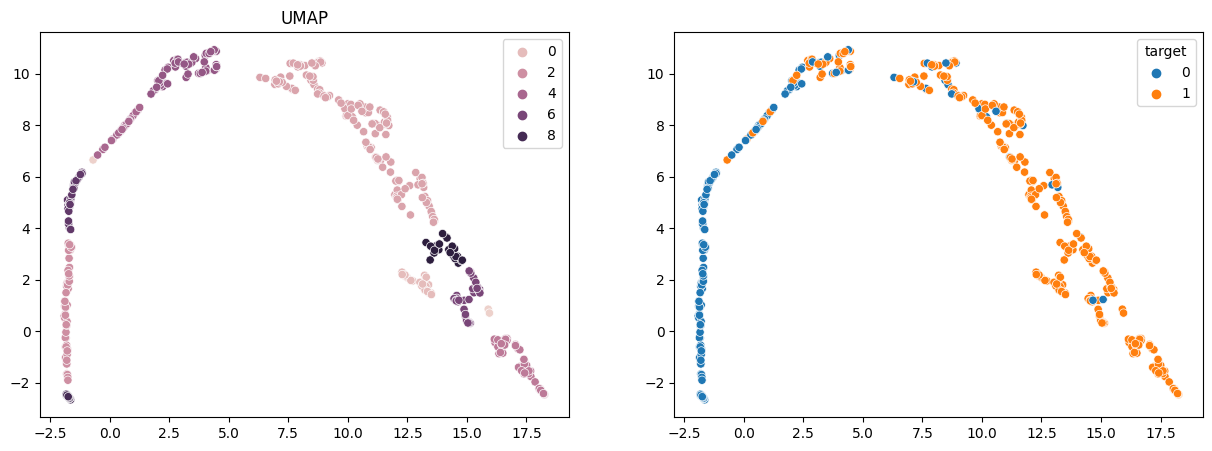

In [108]:
cluster_labels, reduced_data, df_no_outliers = umap_dbscan_outliers(train_df, numerical_features, 15, 5, 0.5)

In [110]:

def replace_outliers_with_nan(df, num_cols, threshold=3):
    """
    Description: This function replaces the outliers in the numerical columns of a dataframe with NaNs
    Input: 
        - df: Pandas dataframe
        - num_cols: list of numerical columns in the dataframe
        - threshold: the number of standard deviations from the mean beyond which a data point is considered an outlier
    Output:
        - df_no_outliers: The input dataframe with the outliers replaced by NaNs
    """
    
    df_no_outliers = df.copy()
    
    for col in num_cols:
        col_mean, col_std = np.mean(df[col]), np.std(df[col])
        cut_off = col_std * threshold
        lower, upper = col_mean - cut_off, col_mean + cut_off
        outliers = df_no_outliers[(df_no_outliers[col] < lower) | (df_no_outliers[col] > upper)].index
        df_no_outliers.loc[outliers, col] = np.nan
        
    return df_no_outliers


In [111]:
train_df = replace_outliers_with_nan(df_no_outliers, numerical_features)

train_df.isnull().sum().sort_values(ascending=False)

mean area                  7
pca_c1                     7
mean perimeter             5
mean radius                4
pca_c2                     3
mean texture               1
worst symmetry             0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
mes                        0
worst fractal dimension    0
categorical_column         0
worst texture              0
target                     0
umap_c1                    0
umap_c2                    0
tsne_c1                    0
worst perimeter            0
fractal dimension error    0
worst radius               0
radius error               0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
texture error              0
symmetry error             0
perimeter error            0
area error                 0
smoothness err

In [129]:

def imputation_comparison(train_df, label_name, numerical_features, cv, miss_forest=False) -> pd.DataFrame:
    """
    Description: This function tests all methods of imputing missing values for numerical features and compares their performance using cross-validation with logistic regression and Lasso regularization.
    Input: 
        - train_df: Pandas dataframe with the data to be imputed and tested
        - label_name: Name of the column with the label
        - numerical_features: List of names of the numerical features to be imputed
        - cv: KFold object with the cross-validation parameters
        - miss_forest: Boolean indicating whether to include the missForest method (default False)
    Output:
        - None
    """
    
    imputer_list = {'mean': SimpleImputer(strategy='mean'),
                    'median': SimpleImputer(strategy='median'),
                    'most_frequent': SimpleImputer(strategy='most_frequent'),
                    'knn': KNNImputer()}
    
    # if miss_forest:
    #     imputer_list['missForest'] = MissForest()
    
    results = []
    names = []
    df = train_df[numerical_features + [label_name]]

    for name, imputer in imputer_list.items():
        pipeline = make_pipeline(imputer, MinMaxScaler(), LogisticRegression(penalty='l1', solver='liblinear'))
        scores = cross_val_score(pipeline, df[numerical_features], df[label_name], cv=cv, scoring='roc_auc')
        results.append(scores)
        names.append(name)
        msg = "%s: %f (%f)" % (name, scores.mean(), scores.std())
        print(msg)

    fig = plt.figure()
    fig.suptitle('Imputation Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

mean: 0.960803 (0.017477)
median: 0.959989 (0.018077)
most_frequent: 0.960780 (0.018052)
knn: 0.963164 (0.017349)


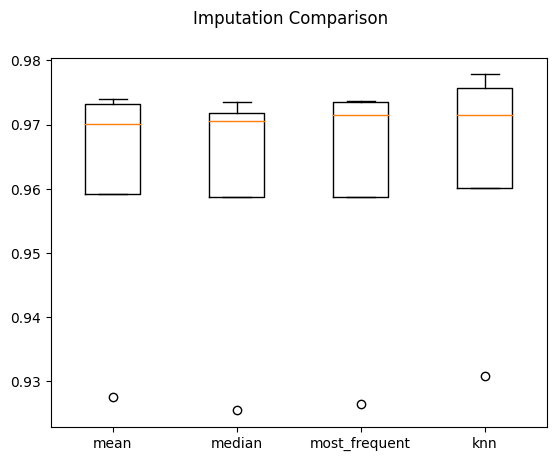

In [130]:
imputation_comparison(train_df, 'target', numerical_features, cv_df, miss_forest=True)

In [131]:
selected_imputer = 'knn'

In [ ]:
train_df_imputed = apply_imputation(train_df, numerical_features, selected_imputer)
train_df_imputed.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,categorical_column,mes,target
50,11.76,21.60,74.72,427.9,0.08637,0.04966,0.016570,0.011150,0.1495,0.05888,...,516.5,0.10850,0.08615,0.055230,0.03715,0.2433,0.06563,C,201901,1
446,17.75,28.03,117.30,981.6,0.09997,0.13140,0.169800,0.082930,0.1713,0.05916,...,1437.0,0.14010,0.37620,0.639900,0.19700,0.2972,0.09075,A,201909,0
11,15.78,17.89,103.60,781.0,0.09710,0.12920,0.099540,0.066060,0.1842,0.06082,...,1299.0,0.13960,0.56090,0.396500,0.18100,0.3792,0.10480,C,201909,0
387,13.88,16.16,88.37,596.6,0.07026,0.04831,0.020450,0.008507,0.1607,0.05474,...,745.3,0.08484,0.12330,0.109100,0.04537,0.2542,0.06623,B,201903,1
333,11.25,14.78,71.38,390.0,0.08306,0.04458,0.000974,0.002941,0.1773,0.06081,...,492.7,0.11660,0.09794,0.005518,0.01667,0.2815,0.07418,A,201907,1


StandardScaler: 0.953715 (0.025962)
MinMaxScaler: 0.953629 (0.025717)
MaxAbsScaler: 0.946837 (0.029790)
RobustScaler: 0.953183 (0.025796)
Normalizer: 0.907548 (0.043679)
PowerTransformer: 0.956796 (0.024761)


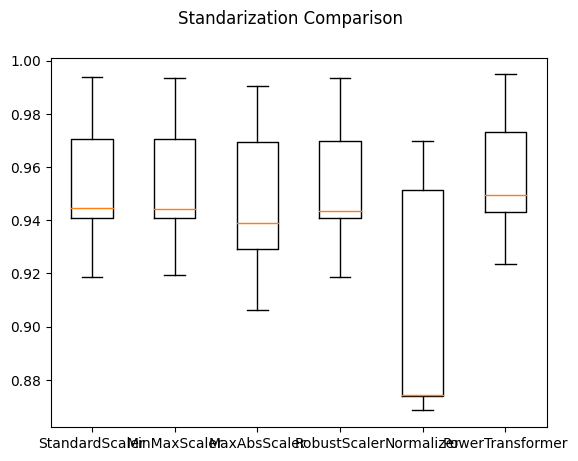

In [ ]:
ml_functions.standarization_comparison(train_df_imputed, cv_df, 'target', numerical_features, scoring_metric = 'roc_auc_ovo')

In [ ]:
selected_standarization = 'RobustScaler'

onehot:0.526221 (0.042663)
target:0.546256 (0.051857)
binary:0.526221 (0.042663)
ordinal:0.467844 (0.035967)
hashing:0.515206 (0.036881)
helmert:0.526221 (0.042663)
sum:0.526221 (0.042663)
polynomial:0.526221 (0.042663)
backward:0.526221 (0.042663)
base:0.526221 (0.042663)
catboost:0.500000 (0.000000)
james:0.546256 (0.051857)
mestimator:0.546256 (0.051857)
woe:0.546256 (0.051857)
count:0.494351 (0.047914)
leave:0.500000 (0.000000)


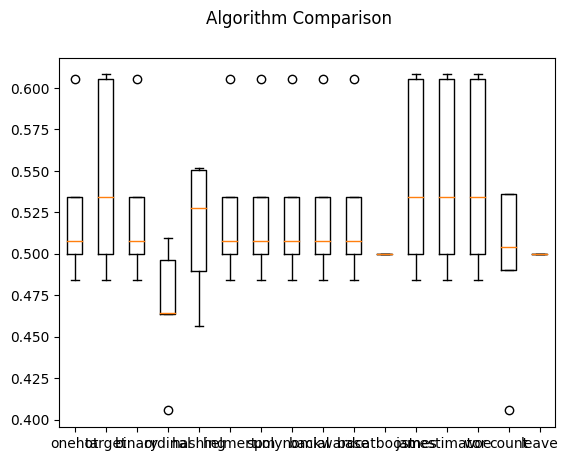

In [ ]:
ml_functions.compare_encoders(train_df_imputed, cv_df, 'target', categorical_features, scoring_metric = 'roc_auc_ovo')

In [ ]:
selected_encoder = 'hashing'

random:0.956027 (0.020284)
smote:0.956853 (0.011754)
adasyn:0.939699 (0.017752)
borderline:0.941605 (0.017330)
svm:0.950598 (0.017064)
kmeans:0.970186 (0.011595)
smotetomek:0.969401 (0.007347)


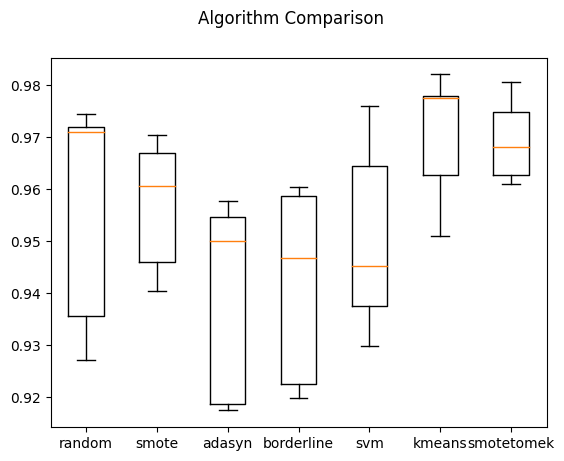

In [ ]:
ml_functions.compare_balancing(train_df_imputed, cv_df, 'target', numerical_features, categorical_features, selected_standarization, selected_encoder, metric='roc_auc_ovo')

In [ ]:
selected_balancing = 'kmeans'

In [ ]:
X_train, y_train, X_validation, y_validation, X_scoring = ml_functions.data_preparation(train_df_imputed, 'target', validation_df, scoring_df, numerical_features, categorical_features, selected_standarization, selected_encoder, selected_balancing)

Pre-balancing
1    301
0    184
Name: target, dtype: int64
Post-balancing
0    302
1    301
Name: target, dtype: int64


In [ ]:
mvp_model, mvp_metrics = ml_functions.train_mvp_logistic_lasso_regression_random_search(X_train, y_train, X_validation, y_validation, 'target', cv_df)

Best hyperparameters: {'class_weight': 'balanced', 'C': 545.5594781168514}
Best score: 0.9839485459337999
Best estimator: LogisticRegression(C=545.5594781168514, class_weight='balanced', penalty='l1',
                   random_state=42, solver='liblinear')
Accuracy: 0.918918918918919
Precision: 0.8846153846153846
Recall: 1.0
F1: 0.9387755102040816
ROC AUC: 0.8928571428571428
Confusion matrix: [[11  3]
 [ 0 23]]
Overfitting: -0.07128556027370136


  0%|          | 0/37 [00:00<?, ?it/s]

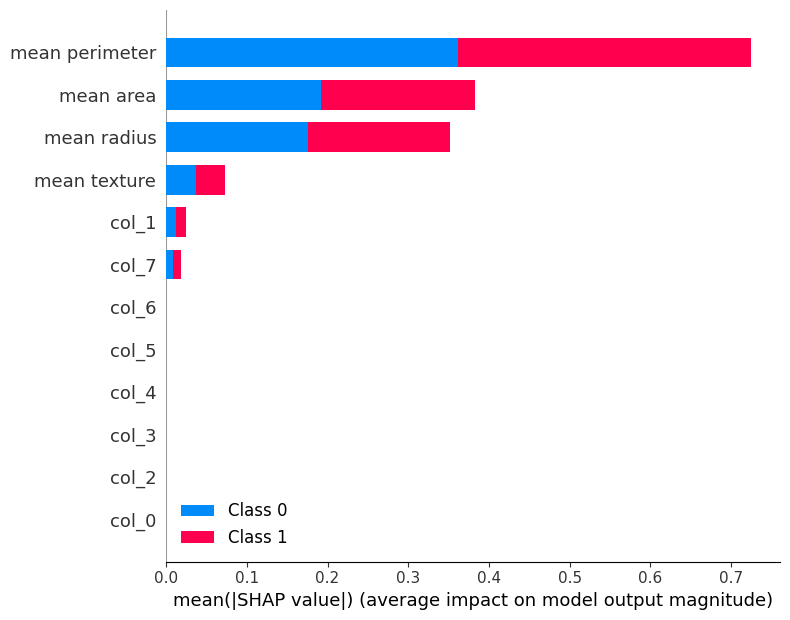

In [ ]:
ml_functions.shap_values_importance(mvp_model, X_train, X_validation, y_train, y_validation)

In [ ]:
predictions = ml_functions.mvp_predictions(mvp_model, X_scoring)
predictions.head()

,prediction,probability
0,1,0.977975
1,1,0.925383
2,1,0.921692
3,0,0.190655
4,1,0.982286


### Piloto - Control

In [ ]:
effect_numerical_features = ['mean radius', 'mean texture']
piloto_df, piloto_control_means = ml_functions.piloto_control(X_scoring, predictions, effect_numerical_features)
piloto_df.head()
piloto_control_means.head()

,piloto_control,mean_probability,mean radius,mean texture
0,control,0.678083,0.015191,0.183395
1,piloto,0.662627,0.306001,0.095061


### Histórico de versiones

In [ ]:
ml_functions.save_model_metrics('Modelo de Churn para Mayorista', '1.0', mvp_metrics, 'Modelo de Churn para Mayorista', selected_imputer, selected_encoder, selected_balancing, X_train.columns, 'LR')

Modelo guardado en el excel


### Pipeline

- Llevar el código al pipeline y dejar funcionando el modelo

### Versionado en CodeCommit

- git status
- git stash
- git pull
- git stash pop
- git add .
- git commit -m "Feat (sprint_1): add classification baseline"
- git push
- git tag -a v0.1.0 -m "Feat (sprint_1): add classification baseline"
- git push origin v0.1.0
- git stash pop

### Presentación al stakeholder técnico

Se revisarán los temas:
- Modelo funcionando en todos los items del sprint 1
- Documentación completa y clara
- Código limpio y bien comentado
- Buenas prácticas de programación
- Lógica de las variables más importantes
- Versionado en CodeCommit
- Buenas prácticas de Git
- Buenas prácticas de AWS(Instancias, roles, etc)
- Métricas del modelo
- Calidad de los datos
- EDA
- Análisis de outliers
- Análisis de missing values
- Análisis de variables categóricas
- Análisis de variables numéricas
- Regularización
- Feature engineering
- Feature selection
- Entendimiento del problema
- Entendimiento de los datos
- Nombramiento correcto de variables
- Ventana de tiempo correcta
- Correcta creación de variable target
- Correcta creación de variables explicativas
- Explicación de las variables más importantes
- Explicación de las métricas del modelo
- Explicación de las métodologías seleccionadas
- Explicación de las decisiones tomadas
- Explicación de las nuevas varibles a incorporar
- Overfitting
- Pipeline de MLops

### Escritura de la documentación

- Documentación del modelo sobre la estructura del archivo 'README.md'